In [1]:
#ignore annoying deprecation warnings
import warnings
warnings.filterwarnings('ignore')

# Regression Analysis in Python!


## Introduction

**Regression analysis** is a type of statistical modeling that focuses on the relationship between a *dependent (outcome) variable* and one or more *independent (predictor) variables*. Regression analysis is widely used for both prediction and forecasting, and is also commonly used to understand the extent to which different independent variables are related to the dependent variable. Regression models take the form of an equation that predicts an outcome from one or more predictors. For a model with a single predictor, the equation looks like this:

*Y*′ = *b*<sub>0</sub> + *b*<sub>1</sub>*x*<sub>1</sub>

As shown in the equation, estimated (predicted) values of the Y variable (*Y*′) are based on the value of a constant (i.e., the *intercept*, *b*<sub>0</sub>) and the value of a predictor variable (*x*<sub>1</sub>) multiplied by its respective slope (*b*<sub>1</sub>).

Regression equations can also include multiple predictors:

*Y*′ = *b*<sub>0</sub> + *b*<sub>1</sub>*x*<sub>1</sub> + *b*<sub>2</sub>*x*<sub>2</sub> + *b*<sub>3</sub>*x*<sub>3</sub> + *b*<sub>4</sub>*x*<sub>4</sub>...

Regression equations can have as many predictors as are necessary, with the caveat that each additional predictor variable should only be added to the equation if it significantly improves the accuracy of the prediction.

## Load Libraries and Data

In this lesson, we'll be using the *Affairs* data that we prepared in our previous lesson to learn how to perform regression analyses in Python. We'll be using functions in the *statsmodels* library to actually estimate our regression models.

In [2]:
#import libraries
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm

#allow plots to be displayed inside data frames
%matplotlib inline

#load the Affairs dataset from a CSV file, and assign it to a pandas dataframe
df = pd.read_csv('affairs.csv')

df['number_of_lovers'] = np.log1p(df['number_of_lovers'])

#view the first 10 rows of data in the dataframe
df.head(10)

religious  occupation  occupation_husb  log_children   log_age  \
0          3           2                5      1.386294  3.465736   
1          2           5                4      1.871802  3.610918   
2          1           3                5      1.098612  3.295837   
3          3           3                5      1.098612  3.295837   
4          1           4                4      0.693147  3.091042   
5          2           3                6      1.098612  3.610918   
6          2           5                4      0.000000  3.610918   
7          2           3                4      0.000000  3.091042   
8          3           5                4      1.871802  3.737670   
9          4           3                4      1.098612  3.295837   

   log_yrs_married  log_educ  exp_rate_marriage   affairs  had_an_affair  \
0         2.302585  2.833213          20.085537  0.111111              1   
1         3.178054  2.484907         148.413159  0.852174              1   
2         1.945910  2.772589           7.389056  3.266665              1   
3         1.945910  2.639057         148.413159  2.041666              1   
4         1.945910  2.639057          54.598150  3.266665              1   
5         2.302585  2.639057          54.598150  1.361111              1   
6         1.945910  2.772589          54.598150  2.041666              1   
7         1.252763  2.639057         148.413159  7.839996              1   
8         3.178054  2.484907          20.085537  0.532609              1   
9         2.302585  2.995732           7.389056  0.622222              1   

   number_of_lovers  times_per_lover  
0          0.693147              1.0  
1          1.504077              5.6  
2          1.504077              5.6  
3          1.504077              3.5  
4          1.504077              5.6  
5          1.504077              3.5  
6          1.504077              3.5  
7          1.504077              5.6  
8          1.504077              3.5  
9          0.693147              5.6

## Variable Definitions

The variables contained in the data set are:

#### religious
The extent to which each woman is religious.

#### occupation
The level of social status of each woman's occupation.

#### occupation_husb
The level of social status of the occupation of each woman's husband.

#### log_children
Each woman's number of children (log transformed).

#### log_age
Each woman's age in years (log transformed).

#### log_yrs_married
The number of years that each woman has been married (log transformed).

#### log_educ
Each woman's years of education (log transformed).

##### exp_rate_marriage
How happy each woman is with her marriage (exponentially transformed).

#### affairs
A measure of time that each woman has spent in extramarital affairs.

#### had_an_affair
Indicates whether each woman had at least one affair.

#### number_of_lovers
The number of men with whom each woman had affairs.

#### times_per_lover
The average number of times that a woman had sexual relations with each lover in an affair.

## Simple Regression
In this lesson we will be using the `OLS` (ordinary least squares) function from the Statsmodels package to perform our regression analyses. The `OLS` function requires two input parameters:
1. The vector for the dependent (outcome) variable, and
2. An array containing one or more independent (predictor) variables.

Note that we must also use the `add_constant` function in order to include an intercept term ($b_0$) in our regression models.

Let's perform a simple regression analysis where we predict how many extramarital affairs a woman will have (the *number_of_lovers* variable) based on how happy she is with her marriage (the *exp_rate_marriage* variable):

In [3]:
#define the collection of predictors, including an intercept term
predictors = sm.add_constant(df.exp_rate_marriage, prepend = False)

#define the dependent and independent variables for the model
reg_mod = sm.OLS(df.number_of_lovers, predictors)

#fit the regression model
reg_results = reg_mod.fit()

We can view the results of the regression model by calling the `summary` method of our `reg_results` object:

In [4]:
#show the regression results
print(reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:       number_of_lovers   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     385.3
Date:                Fri, 26 Oct 2018   Prob (F-statistic):           7.28e-83
Time:                        00:02:52   Log-Likelihood:                -4537.0
No. Observations:                5291   AIC:                             9078.
Df Residuals:                    5289   BIC:                             9091.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
exp_rate_marriage    -0.0028      0.00

The coefficients for the regression model are displayed in the results (the intercept term is shown as `const`). Given these coefficients, our regression equation is:

> number of lovers = 1.3736 - 0.0077(happiness with marriage).

The *p*-value for the *exp_rate_marriage* is less than 0.05, so we can conclude that the extent to which a woman is happy with her marriage is a significant predictor of how many extramarital lovers she will have. The fact that the coefficient for this variable is negative indicates that on average, women who are happier with their marriages will have fewer extramarital lovers.

Note that the overall adjusted R-square value for the model is just 0.055. This suggests that when considered alone, *exp_rate_marriage* can only explain about 5.5% of the variance in *number_of_lovers*.

Let's visualize our results:

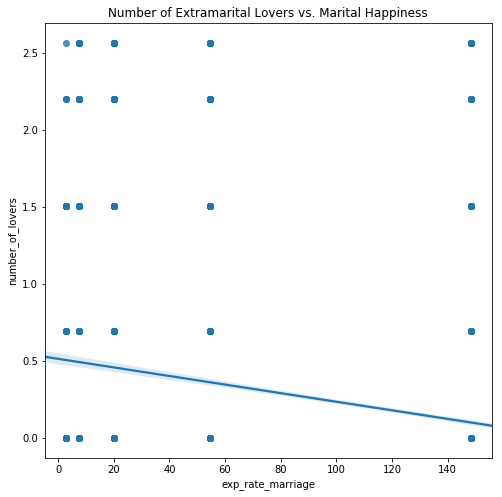

In [5]:
#draw a scatter plot with a best-fit line
ax = plt.figure(figsize=(8, 8)).gca() # define axis
sns.regplot(x='exp_rate_marriage', y='number_of_lovers', data=df, ax = ax)
plt.title('Number of Extramarital Lovers vs. Marital Happiness')
plt.show()

## Multiple Regression
Can we improve our model by including more predictor variables? Let's find out by conducting a *multiple regression analysis*. The model below includes *religious*, *occupation*, *occupation_husb*, *log_children*, *log_age*, *log_yrs_married*, *log_educ*, and *exp_rate_marriage* as predictor variables:

In [6]:
#define the collection of predictors, including an intercept term
predictors = sm.add_constant(df[['religious', 'occupation', 'occupation_husb', 'log_children', 'log_age', 'log_yrs_married', 'log_educ', 'exp_rate_marriage']], prepend = False)

#define the dependent and independent variables for the model
reg_mod = sm.OLS(df.number_of_lovers, predictors)

#fit the regression model
reg_results = reg_mod.fit()

#show the regression results
print(reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:       number_of_lovers   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     90.06
Date:                Fri, 26 Oct 2018   Prob (F-statistic):          1.15e-140
Time:                        00:02:59   Log-Likelihood:                -4384.7
No. Observations:                5291   AIC:                             8787.
Df Residuals:                    5282   BIC:                             8847.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
religious            -0.0748      0.00

In [10]:
#define the collection of predictors, including an intercept term
predictors = sm.add_constant(df[['religious', 'occupation', 'log_age', 'log_yrs_married', 'log_educ', 'exp_rate_marriage']], prepend = False)

#define the dependent and independent variables for the model
reg_mod = sm.OLS(df.number_of_lovers, predictors)

#fit the regression model
reg_results = reg_mod.fit()

#show the regression results
print(reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:       number_of_lovers   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     120.1
Date:                Fri, 26 Oct 2018   Prob (F-statistic):          1.12e-142
Time:                        00:04:30   Log-Likelihood:                -4384.9
No. Observations:                5291   AIC:                             8784.
Df Residuals:                    5284   BIC:                             8830.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
religious            -0.0751      0.00

All of our predictors are now statistically significant at the 0.05 level, and the adjusted R-square value for the model as a whole indicates that we are able to predict about 10% of the variance in *number_of_lovers* using our set of predictors. Based on the signs of the predictors, we can preliminarily conclude the following:
1. Women who are more religious tend to have fewer extramarital lovers
2. Women with higher-status occupations tend to have more extramarital lovers
3. Older women tend to have fewer extramarital lovers
4. The longer that a woman has been married, the likelier it is that she will have multiple extramarital affairs.
5. More educated tend to have fewer extramarital lovers
6. Women who are happier in their marriages tend to have fewer extramarital lovers